# Relatorio de Análise VII

## Criando Agrupamentos

In [70]:
!pip install matplotlib

In [72]:
# importando os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize = (20,10))

In [55]:
# importando a base de dados
dados = pd.read_csv('dados/aluguel_residencial_03.csv', sep = ';')

In [56]:
# vendo os 10 primeiros registros

dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [57]:
# avaliando a média dos valores
dados['Valor'].mean()

5046.172821405663

In [58]:
# criando lista com bairros sem duplicata

bairro = ['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema', 'Campo Grande', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Flamengo', 'Piedade', 'Lagoa', 'Catete', 'Jardim Carioca',
       'Benfica', 'Glória', 'Praça Seca', 'Vila Isabel', 'Engenho Novo',
       'Engenho de Dentro', 'Pilares', 'Água Santa', 'São Cristóvão',
       'Ilha do Governador', 'Jardim Sulacap', 'Oswaldo Cruz',
       'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque', 'Vaz Lobo',
       'Madureira', 'São Francisco Xavier', 'Pechincha', 'Leme', 'Irajá',
       'Quintino Bocaiúva', 'Urca', 'Penha', 'Gardênia Azul',
       'Rio Comprido', 'Andaraí', 'Santa Teresa', 'Inhaúma',
       'Marechal Hermes', 'Curicica', 'Santíssimo', 'Moneró', 'Camorim',
       'Cascadura', 'Praia da Bandeira', 'Saúde', 'Joá', 'Realengo',
       'Fátima', 'Inhoaíba', 'Rocha', 'Jardim Guanabara', 'Jabour',
       'Braz de Pina', 'Praça da Bandeira', 'Vila Kosmos', 'Vista Alegre',
       'Encantado', 'Campinho', 'Guaratiba', 'Riachuelo', 'Bangu', 'Lapa',
       'Catumbi', 'Penha Circular', 'Abolição', 'Tomás Coelho', 'Colégio',
       'Pavuna', 'Santa Cruz', 'Alto da Boa Vista', 'Cidade Nova',
       'Bento Ribeiro', 'Estácio', 'Jardim América', 'Cordovil', 'Caju',
       'Pedra de Guaratiba', 'Padre Miguel', 'Paciência', 'Del Castilho',
       'Arpoador', 'Sampaio', 'Anchieta', 'Icaraí', 'Senador Vasconcelos',
       'Rocha Miranda', 'Gamboa', 'Maria da Graça', 'Barra de Guaratiba',
       'Vicente de Carvalho', 'Paquetá', 'Largo do Machado',
       'Parada de Lucas', 'Freguesia (Ilha do Governador)', 'Portuguesa',
       'Guadalupe', 'Parque Anchieta', 'Turiaçu', 'Pitangueiras',
       'Vila Militar', 'Vidigal', 'Senador Camará', 'Usina',
       'Vigário Geral', 'Cosmos', 'Jacaré', 'Cocotá', 'Honório Gurgel',
       'Engenho da Rainha', 'Cachamorra', 'Zumbi', 'Tauá', 'Santo Cristo',
       'Ribeira', 'Magalhães Bastos', 'Cacuia', 'Bancários', 'Cavalcanti',
       'Rio da Prata', 'Cidade Jardim', 'Coelho Neto']

In [59]:
# usando metodo ISIN() 

selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [60]:
# criando agrupamentos com valores esclusivos 
dados['Bairro'].drop_duplicates()
grupo_bairro = dados.groupby('Bairro')
# grupo_bairro.groups

In [61]:
# usando laço de repetição para percorrer o dataset e retornar o valor médio por bairro

for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Abolição -> 1195.3333333333333
Alto da Boa Vista -> 3966.6666666666665
Anchieta -> 875.0
Andaraí -> 1464.7113402061855
Anil -> 2048.8732394366198
Arpoador -> 12923.916666666666
Bancários -> 1825.0
Bangu -> 1016.0
Barra da Tijuca -> 7069.552938130986
Barra de Guaratiba -> 5550.0
Benfica -> 996.0
Bento Ribeiro -> 1030.8695652173913
Bonsucesso -> 1225.9322033898304
Botafogo -> 8791.828178694159
Braz de Pina -> 1115.0
Cachambi -> 1157.1742424242425
Cachamorra -> 3000.0
Cacuia -> 916.6666666666666
Caju -> 850.0
Camorim -> 1735.2272727272727
Campinho -> 1037.3333333333333
Campo Grande -> 1267.71714922049
Cascadura -> 948.7096774193549
Catete -> 2267.0625
Catumbi -> 1112.5
Cavalcanti -> 595.0
Centro -> 1254.7521865889212
Cidade Jardim -> 12000.0
Cidade Nova -> 1471.4285714285713
Cocotá -> 1883.3333333333333
Coelho Neto -> 700.0
Colégio -> 885.0
Copacabana -> 4126.677004538578
Cordovil -> 905.5555555555555
Cosme Velho -> 5343.548387096775
Cosmos -> 658.3333333333334
Curicica -> 1514.5657894736

In [62]:
# usando valor médio de uma outra forma

df = pd.DataFrame(grupo_bairro[['Valor', 'Condominio']].mean().round(2))

In [63]:
df

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


In [64]:
df.to_excel('dados/valor_bairro.xlsx')

## Estatística Descritiva

In [65]:
# Estatística Basica
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [66]:
# Escolhendo as estatiscas que devem ser mostradas

grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


Text(0.5, 1.0, 'Valor médio do Alguel bairro')

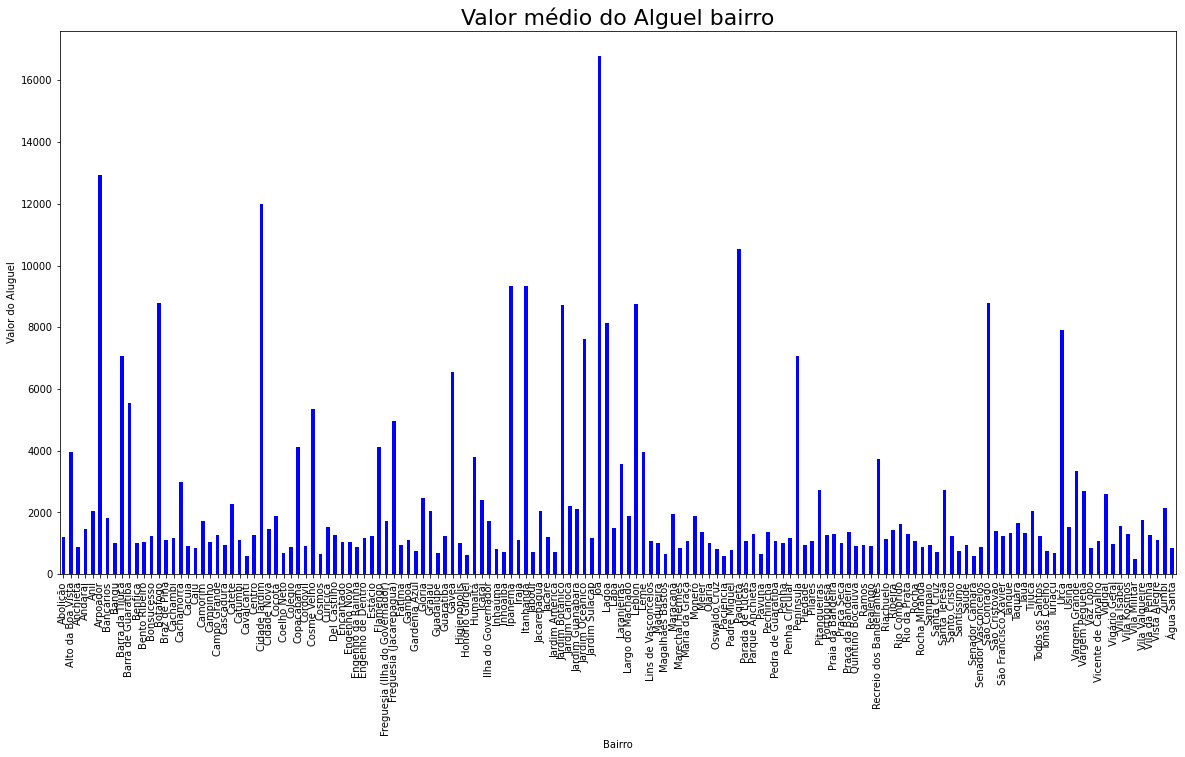

In [92]:
# Gerando graficos com Matplotlib
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do Alguel bairro', {'fontsize': 22})